### Step 1: Load and Merge Data

We have three sheets:
- Sector info (symbol → sector)
- Stock prices from 2010–2020
- Stock prices from 2021–2024

Let’s load and merge these sheets into a single DataFrame.

In [51]:
import pandas as pd

pd.set_option('display.max_rows', 80000)

# Load Excel file
excel_file = './stock_market_data.xlsx'

# Read each sheet
sector_df = pd.read_excel(excel_file, sheet_name='Sector')
prices_2010_2020 = pd.read_excel(excel_file, sheet_name='2010-2020')
prices_2021_2024 = pd.read_excel(excel_file, sheet_name='2021-2024')

# Combine price data
price_df = pd.concat([prices_2010_2020, prices_2021_2024], ignore_index=True)

# Show preview
print(sector_df.head())
print(price_df.head())


       Symbol        Sector
0   1JANATAMF  MUTUAL FUNDS
1     1STBSRS  MUTUAL FUNDS
2      1STICB  MUTUAL FUNDS
3  1STPRIMFMF  MUTUAL FUNDS
4      2NDICB  MUTUAL FUNDS
        Date      Symbol  Open_Price  High_Price  Low_Price  Closing_Price
0 2010-01-03     1STBSRS      1265.0     1265.00     1140.0        1149.25
1 2010-01-03      1STICB      8200.0     8200.00     8000.0        8100.00
2 2010-01-03  1STPRIMFMF        32.3       32.60       31.7          31.80
3 2010-01-03      3RDICB      1632.0     1632.00     1632.0        1632.00
4 2010-01-03      4THICB      1676.0     1680.75     1672.0        1676.00


### Step 2: Clean and Prepare the Data

Now we will:
- Convert the 'Date' column to datetime format  
- Merge with the sector info  
- Keep only 'Date', 'Sector', and 'Closing_Price'  
- Sort the data chronologically


In [56]:
# convert data to datetime format
price_df['Date'] = pd.to_datetime(price_df['Date'])

# marge the sector information with the price data
merged_df = pd.merge(price_df, sector_df, on='Symbol', how='left')

# drop unnecessary columns
clean_df = merged_df[['Date', 'Sector', 'Closing_Price']]

#debug sectoral data
# clean_df = merged_df[['Date','Symbol', 'Sector', 'Closing_Price']]

# Sort the data by Date
clean_df = clean_df.sort_values(by=['Date','Sector']).reset_index(drop=True)

# # show only treasury bond data
# clean_df = clean_df[clean_df['Sector'] == 'TRAVEL LEISURE']

clean_df.head(50)


,Date,Sector,Closing_Price
0,2010-01-03,BANK,1139.75
1,2010-01-03,BANK,522.25
2,2010-01-03,BANK,452.00
3,2010-01-03,BANK,687.25
4,2010-01-03,BANK,714.50
5,2010-01-03,BANK,465.25
6,2010-01-03,BANK,1910.25
7,2010-01-03,BANK,610.50
8,2010-01-03,BANK,367.75
9,2010-01-03,BANK,221.00


### Step 3: Feature Engineering - Add Time-Based Columns

We extract useful time-based features such as:
- Year
- Month
- Month Name
- Quarter

These will help in grouping sector performance seasonally or over time.


In [24]:
# Extract time-based features from the Date column
clean_df['Year'] = clean_df['Date'].dt.year
clean_df['Month'] = clean_df['Date'].dt.month
clean_df['Month_Name'] = clean_df['Date'].dt.month_name()
clean_df['Quarter'] = clean_df['Date'].dt.quarter

# Preview the updated DataFrame
clean_df.head(50)

,Date,Sector,Closing_Price,Year,Month,Month_Name,Quarter
0,2010-01-03,BANK,1139.75,2010,1,January,1
1,2010-01-03,BANK,522.25,2010,1,January,1
2,2010-01-03,BANK,452.00,2010,1,January,1
3,2010-01-03,BANK,687.25,2010,1,January,1
4,2010-01-03,BANK,714.50,2010,1,January,1
5,2010-01-03,BANK,465.25,2010,1,January,1
6,2010-01-03,BANK,1910.25,2010,1,January,1
7,2010-01-03,BANK,610.50,2010,1,January,1
8,2010-01-03,BANK,367.75,2010,1,January,1
9,2010-01-03,BANK,221.00,2010,1,January,1


### Step 4: Monthly Sector Aggregation

- We’ll group the cleaned data by `Sector+Month+Year`.
- Market behavior in `2010 ≠ 2020 ≠ 2024`. So for monthly aggregation `year` is a senstive feeature
- Events like COVID, political shifts, inflation, etc. affect different years uniquely.
- So basically grouping by month alone captures just s`easonality`. But adding year shows the `seasonal trends over time`.


In [40]:
# Group by Sector, Year, and Month to calculate average closing price
monthly_avg_df = clean_df.groupby(['Sector', 'Year', 'Month']).agg(
    Avg_Closing_Price=('Closing_Price', 'mean')
).reset_index()

# Optional: Sort for readability
monthly_avg_df = monthly_avg_df.sort_values(by=['Sector', 'Year', 'Month'])

# Preview
monthly_avg_df.head(20)

,Sector,Year,Month,Avg_Closing_Price
0,BANK,2010,1,661.658717
1,BANK,2010,2,722.515483
2,BANK,2010,3,619.374201
3,BANK,2010,4,580.931140
4,BANK,2010,5,626.986561
5,BANK,2010,6,691.449457
6,BANK,2010,7,745.219454
7,BANK,2010,8,676.394885
8,BANK,2010,9,583.968574
9,BANK,2010,10,581.635452


### Step 5: Visualize Sectoral Performance with a Heatmap

In this step, we create a heatmap to visualize how different sectors have performed over time.

**Purpose:**
- To identify seasonal patterns and trends in sector performance.
- To observe how each sector's average closing price changes across months and years.

**How it works:**
- We group the data by `Sector`, `Year`, and `Month`.
- We calculate the average closing price for each combination.
- We reshape the data using a pivot table to prepare it for a heatmap.
- We plot the heatmap using Seaborn for visual insight.

This gives us a powerful tool to spot sectoral momentum, seasonal booms, and consistent performers.

📌 *Brighter colors indicate higher average closing prices.*


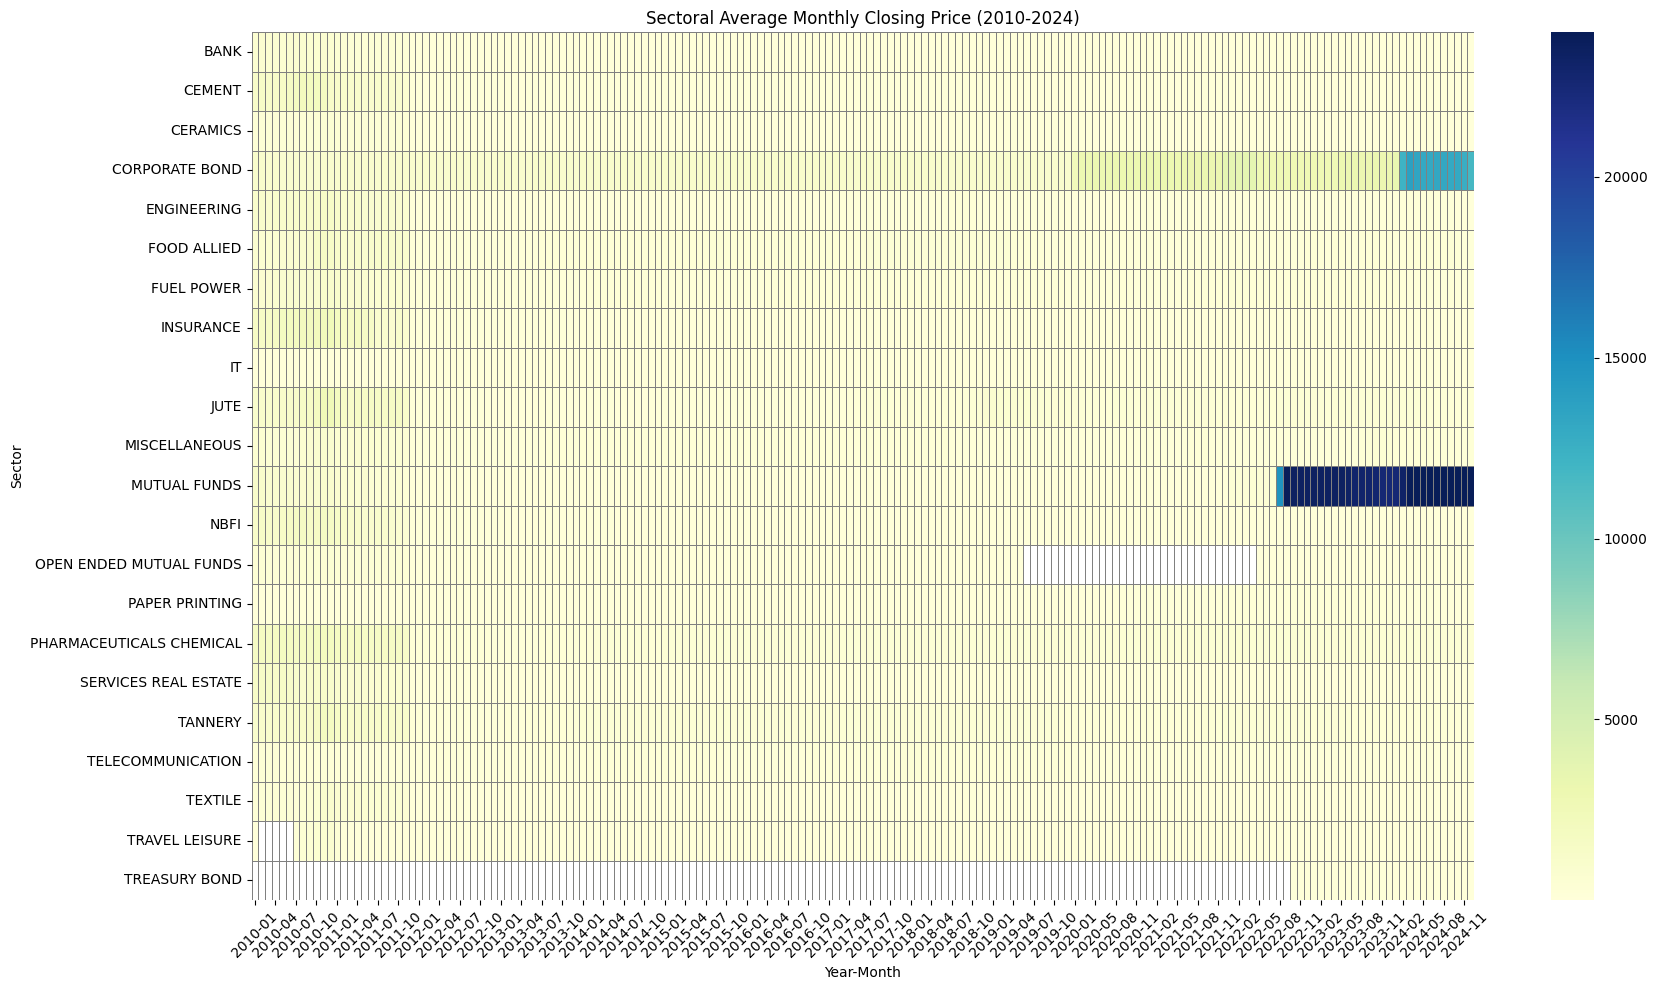

YearMonth,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
Sector,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BANK,661.658717,722.515483,619.374201,580.931140,626.986561,691.449457,745.219454,676.394885,583.968574,581.635452,686.368440,642.258121,488.917030,401.367787,345.153256,317.215954,284.143200,300.288939,349.833389,327.809804,320.310786,286.874311,285.738507,47.339388,45.164492,38.211681,37.326995,38.848930,35.860289,31.906511,29.084921,28.204762,30.368095,31.720877,29.124000,29.327846,29.826087,30.041228,27.381168,23.785413,23.724662,24.779800,23.165000,21.884222,20.991793,21.176809,24.660833,24.406167,25.666611,27.131720,23.943782,23.003716,21.610302,20.673596,20.876621,20.366054,20.698939,23.125490,22.193970,22.592667,22.635500,22.348167,19.903175,17.678167,18.205333,18.703651,19.074118,20.141061,20.410526,21.213500,20.468636,20.507273,20.663016,20.218000,19.248485,18.845439,18.480000,18.737576,19.819412,20.116984,20.975098,21.558500,21.710000,22.544035,25.093188,26.012982,26.798413,25.319048,23.755397,23.826296,26.235758,29.494286,31.992807,33.638485,34.377727,33.600351,32.196087,30.325965,27.820000,28.000952,25.240635,24.142745,22.793182,25.204259,24.708167,24.703188,24.187500,24.436296,27.615507,27.121296,28.162807,23.754500,22.230159,22.035417,21.225152,21.267083,20.205556,20.195152,20.184912,19.873000,18.760000,19.032167,16.849444,16.456667,16.232576,16.513016,18.275439,19.389091,19.072833,19.331061,19.815397,20.956984,19.523333,19.403768,18.509516,20.384720,22.018915,22.195699,22.750088,23.232670,22.770469,23.533523,23.028720,22.965395,22.548804,21.808540,20.708134,19.871717,19.584022,19.141627,19.182273,19.237807,18.985758,18.727273,18.575000,18.609079,18.641022,18.573099,18.451746,18.255102,17.748730,18.001039,17.935195,17.813810,17.765065,17.767662,17.826917,18.013766,18.427096,17.478947,16.924691,16.039167,14.910957,15.594444,17.559064,17.770899,16.947884,16.614306,16.235972
CEMENT,1290.616667,1322.489474,1238.472477,1224.647959,1398.199029,1651.400000,1875.436842,2021.919725,1903.857386,1883.596000,1721.362234,1316.717143,1186.612121,1003.990000,989.991364,1114.614894,884.886864,873.966667,946.167672,898.501961,883.386250,768.314634,654.627778,116.309009,116.505303,91.300877,105.506723,132.620000,127.838710,119.212605,110.549206,116.004762,127.465873,123.989474,116.789916,109.344248,108.992754,114.595614,101.938889,95.740690,100.720438,118.400000,128.632468,132.420952,146.380519,128.783333,134.555797,134.814286,144.42

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# show 200 cols
pd.set_option('display.max_columns', 200)

# Create a new column combining Year and Month for better labels
monthly_avg_df['YearMonth'] = monthly_avg_df['Year'].astype(str) + '-' + monthly_avg_df['Month'].astype(str).str.zfill(2)

# Pivot the table for heatmap
heatmap_df = monthly_avg_df.pivot(index='Sector', columns='YearMonth', values='Avg_Closing_Price')

# Plot the heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_df, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Sectoral Average Monthly Closing Price (2010-2024)")
plt.xlabel("Year-Month")
plt.ylabel("Sector")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# show the pivot table
heatmap_df.head(22)

